In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


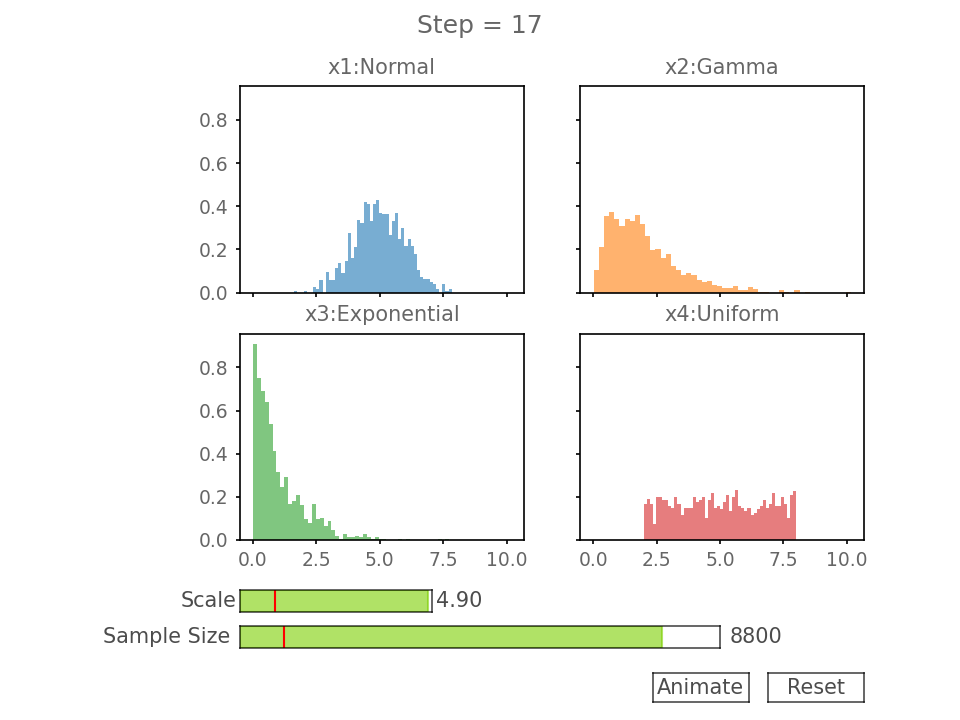

0

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button, CheckButtons
from IPython.display import HTML
import matplotlib.animation as animation

scale_def= 1
sample_def = 1000
a = None

def get_distributions(scale, sample):
    x1 = np.random.normal(5, scale_def, sample_def)
    x2 = np.random.gamma(2, scale_def, sample_def)
    x3 = np.random.exponential(scale_def, sample_def)
    x4 = np.random.uniform(2,8, sample_def)
    return x1, x2, x3, x4

x = get_distributions(scale_def, sample_def)

fig, ((ax_normal, ax_gamma), (ax_exp, ax_uniform)) = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(left=0.25, bottom=0.25)

axs = [ax_normal, ax_gamma, ax_exp, ax_uniform]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
titles = ['x1:Normal', 'x2:Gamma', 'x3:Exponential', 'x4:Uniform']

for i in range(len(axs)):
#     axs[i].hist(x[i], bins=50, density=True, alpha=0.6, color=colors[i])
    axs[i].set_title(titles[i], {'fontsize':'medium', 'color': [0,0,0,0.6]})
    axs[i].tick_params(axis='both', which=u'both', length=2, labelcolor=[0,0,0,0.6], labelsize=9)

axsample = plt.axes([0.25, 0.1, 0.5, 0.03], facecolor='#ffffff', alpha=0.6)
axscale = plt.axes([0.25, 0.15, 0.2, 0.03], facecolor='#ffffff', alpha=0.6)
sample_slider = Slider(axsample, 'Sample Size', 100, 10000, valinit=sample_def, valstep=100, valfmt='%d', color = "#7ccf00", alpha=0.6) #orientation="vertical"
scale_slider = Slider(axscale, 'Scale', 0.1, 5, valinit=scale_def, valstep=0.1, color = "#7ccf00", alpha=0.6)

def update(val):
    sample = int(sample_slider.val)
    scale = scale_slider.val
    global x
    x = get_distributions(scale, sample) 


step_size = 100
# create the function that will do the plotting, where curr is the current frame
def animate(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == step_size: 
        a.event_source.stop()
    interval = int((10000//step_size)*curr)
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(x[i][:interval], bins=50, density=True, alpha=0.6, color=colors[i])
        axs[i].set_title(titles[i], {'fontsize':'medium', 'color': [0,0,0,0.6]})
        axs[i].tick_params(axis='both', which=u'both', length=2, labelcolor=[0,0,0,0.6], labelsize=9)
    fig.suptitle('Step = {}'.format(curr), alpha=0.6)
    fig.canvas.draw_idle()


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(resetax, 'Reset', color=[1,1,1,0.6], hovercolor='r')
def reset(event):
    sample_slider.reset()
    scale_slider.reset()


animateax = plt.axes([0.68, 0.025, 0.1, 0.04])
animate_button = Button(animateax, 'Animate', color=[1,1,1,0.6], hovercolor='lightblue')
def start_animation(event):
    print(sample_slider.val, scale_slider.val)
    global a
    a = animation.FuncAnimation(fig, animate, frames=21, interval=300)
    #a.event_source.start()
    return a.to_html5_video()


## Change color for widget texts and spines
slider_color = [0,0,0,0.7]
[ plt.gcf().get_children()[i].get_children()[j].set_color(slider_color) for i in range(5,7) for j in range(2,8)]   
[ plt.gcf().get_children()[i].get_children()[j].set_color(slider_color) for i in range(7,9) for j in range(5)]


sample_slider.on_changed(update)
scale_slider.on_changed(update)
reset_button.on_clicked(reset)
play = animate_button.on_clicked(start_animation)
play